In [25]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [28]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [29]:
X = df.drop(['RowNumber','CustomerId','Surname','Exited'], axis=1)  # Drop 'Exited' column from features
y = df['Exited']  # Target variable


In [30]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [31]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [33]:
X.Geography.value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [34]:
Geography=pd.get_dummies(X['Geography'],drop_first=True)
Gender=pd.get_dummies(X['Gender'],drop_first=True)

In [35]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [36]:
X=X.drop(['Geography','Gender'],axis=1)

In [37]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [38]:
X=pd.concat([X,Geography,Gender],axis=1)

In [39]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [40]:
X['Germany']=X['Germany'].apply(lambda x:0 if x==False else 1)
X['Spain']=X['Spain'].apply(lambda x:0 if x==False else 1)
X['Male']=X['Male'].apply(lambda x:0 if x==False else 1)

In [41]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [44]:
x_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU,ELU,PReLU
from tensorflow.keras.layers import Dropout

In [47]:
classifier=Sequential()

In [50]:
## adeding input layer
classifier.add(Dense(11,activation='relu'))

In [51]:
##add first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [52]:
##add second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [53]:
## add output layer
classifier.add(Dense(1,activation='sigmoid'))

In [54]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
## Early Stopping'
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [58]:
model=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.2869 - accuracy: 0.8873 - val_loss: 0.3827 - val_accuracy: 0.8466
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.2876 - accuracy: 0.8830 - val_loss: 0.3800 - val_accuracy: 0.8489
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.2851 - accuracy: 0.8845 - val_loss: 0.3847 - val_accuracy: 0.8444
Epoch 4/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.2859 - accuracy: 0.8852 - val_loss: 0.3811 - val_accuracy: 0.8455
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.2851 - accuracy: 0.8843 - val_loss: 0.3822 - val_accuracy: 0.8455
Epoch 6/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.2867 - accuracy: 0.8828 - val_loss: 0.3825 - val_accuracy: 0.8466
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.2842 - accuracy: 0.8839 - val_loss: 0.3828 - val_accuracy:

In [59]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

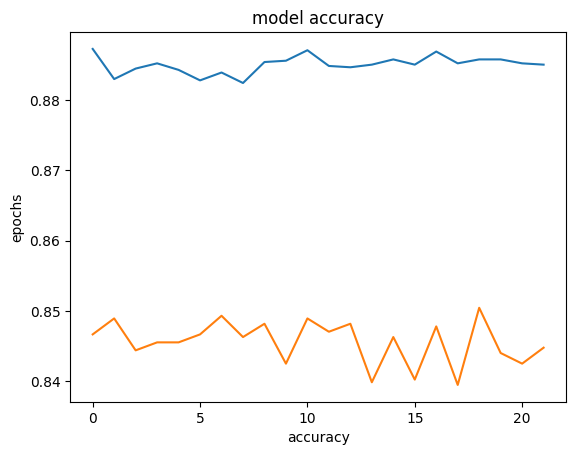

In [61]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title("model accuracy")
plt.xlabel("accuracy")
plt.ylabel("epochs")
plt.show()

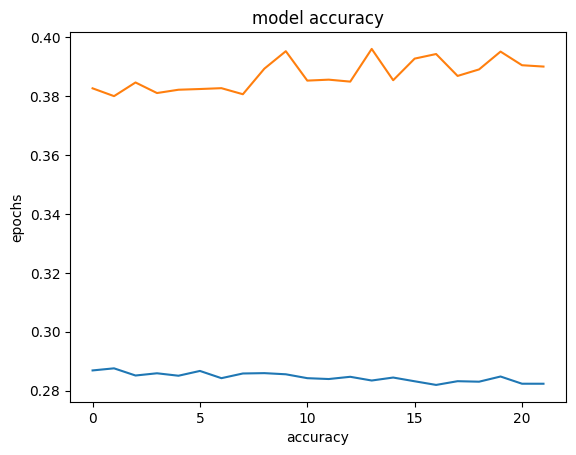

In [62]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title("model accuracy")
plt.xlabel("accuracy")
plt.ylabel("epochs")
plt.show()

In [63]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


In [64]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[1504,  187],
       [ 103,  206]])

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.855

In [66]:
##v get the weights
classifier.get_weights()

[array([[-3.97205651e-01,  3.12522888e-01, -9.98327136e-03,
          1.06181778e-01, -1.51319932e-02, -1.46109864e-01,
          1.39753535e-01, -1.47371609e-02, -1.80845618e-01,
          3.81893575e-01, -2.62106329e-01],
        [-2.66842425e-01, -4.66571957e-01, -1.47521704e-01,
          1.01698542e+00, -8.94234031e-02, -7.80272037e-02,
         -7.21288800e-01,  1.03544664e+00,  1.34150660e+00,
         -2.51828358e-02,  1.17126396e-02],
        [-1.72565520e-01, -8.18377808e-02, -3.73094529e-02,
         -2.61155516e-01,  1.48630425e-01, -2.99859345e-02,
          1.34394348e-01,  2.78708013e-03,  1.59853920e-01,
         -5.71534812e-01, -2.16434285e-01],
        [-7.67865777e-01,  3.01540703e-01,  9.08268034e-01,
          5.00281334e-01, -4.41119462e-01,  3.86371687e-02,
         -5.82738996e-01,  1.05315633e-01,  5.59076779e-02,
         -8.56793582e-01,  8.25811565e-01],
        [ 3.02945942e-01,  9.71370399e-01,  1.04998447e-01,
          2.37720370e-01,  8.89467895e-01,  